La regresión lineal consiste en graficar una linea la cual esté más cerca de todos los puntos que están dentro de un conjunto de datos a trabajar. Se busca minimizar la distancia entre todos los puntos a la línea recta. El dataset se tomó de esta página https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Queremos revisar si los salarios de una población siguen una distribución normal según el rango de los empleados, su disciplina, experiencia, servicio y sexo

In [70]:
#Se lee el csv
df = pd.read_csv('Salaries.csv')

In [71]:
#Se revisa los encabezados de las columnas
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [72]:
#Se revisa el nombre de as columnas
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [73]:
#Se elimina la primera columna porque no sirve para el análisis
df = df.drop('Unnamed: 0',1)

In [74]:
#En la columna de rank, se cambia Prof por 1,  AsstProf por 0 y AssocProf por 2
df['rank'] = df['rank'].map({'Prof': 1, 'AsstProf': 0, 'AssocProf': 2})
#En discipline se cambia B por 1 y A por 0
df['discipline'] = df['discipline'].map({'B': 1, 'A': 0})
#En Sex se cambia Male por 1 y Female por 0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [77]:
#Se revisa de nuevo el nombre de las columnas
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [88]:
#Se asocia al eje X las categorias de rango, disciplina, años, servicio y sexo
X = df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex']]
#Se asocia al eje Y la categoría de salario
y = df['salary']

Aquí se dividen los datos para que unos entrenen el modelo y otros lo prueben

In [89]:
#Se importa librería de sklearn para dividir el dataframe
from sklearn.model_selection import train_test_split

In [90]:
#Se divide la información en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [92]:
#Se importa el modelo de regresión lineal de sklearn
from sklearn.linear_model import LinearRegression

In [83]:
#Se crea una nueva regresión lineal
lr = LinearRegression()

In [84]:
#Se entrena con los datos de entrenamiento
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
#Se prueba de acuerdo a los datos de prueba
predicciones = lr.predict(X_test)

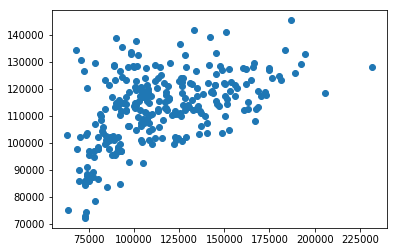

In [86]:
#Se grafica el modelo
plt.scatter(y_test,predicciones)

/home/alfredo/anaconda3/envs/my_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


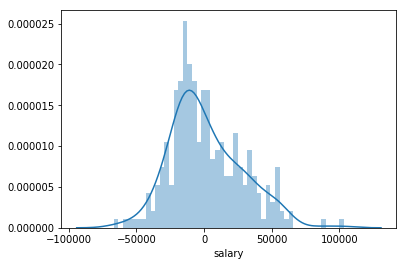

In [87]:
#Se revisa la distribución
sns.distplot((y_test-predicciones),bins=50);

En conclusión, el conjunto de datos elegidos no sigue una distribución normal perfecta y se puede ver tanto el diagrama de puntos como en el diagrama de barras. Esto se debe a que se eligió un dataset de Internet que no cumplía con lo deseado. Sin embargo los cálculos y el proceso de regresión lineal son correctos.